**TO DO** \
**Book24**

1.  Посмотреть категории по возрастам 
2.  Сделать 3 пункт.
3.  ~~Собрать данные повторно в конце каждой недели/каждого дня~~
4.  ~~Сравнить продажи двух/трёх конкурирующих издательств~~
5.  ~~Просто графически отобразить сколько какое издательство издает книг из каждого раздела и кто на чем специализируется~~
6. Доделать пункт 2.4 со сравнением АСТ и Эксмо, потому что там переменные с малоинформативными названиями
***Комментарий к 4 пункту:***
В идеале это сделать на одном графике \
*Не забыть про нормализацию с количественными переменными, ибо бывает всякое* 😊


# **1. Import 💡**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Зададим цвета в палетку для графиков
palette = {
    'АСТ': 'tab:red',
    'Эксмо': 'tab:orange',
}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/PetProjects/Book24/all_books.csv')
book24 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/PetProjects/Book24/book24.csv')

In [5]:
books

,author,name,type,buy,publisher
0,Настя Понедельник,ПРО овощи! Большая книга про овощи и не только...,Книги с автографом,50,БОМБОРА
1,Ричард Осман,"Человек, который умер дважды",Художественная литература,50,МИФ
2,Оксана Бадьина,Сладости без глютена за 30 минут (с автографом),Книги с автографом,30,БОМБОРА
3,Наташа Давыдова,#Здоровоедим. Попробуй счастье на вкус (с авто...,Книги с автографом,22,Эксмо
4,Алёна Солодовиченко,"Вареники и не только. 30+ идеальных рецептов, ...",Книги с автографом,45,БОМБОРА
...,...,...,...,...,...
19619,Марина Рыкалина,"Больше, чем 5 соток. Как на маленьком участке ...",Хобби и досуг,585,Эксмо
19620,Джон Маррс,Code. Носители,Художественная литература,114,Эксмо
19621,Харуки Мураками,От первого лица,Художественная литература,79,Эксмо
19622,Анастасия Гор,Ковен тысячи костей,Художественная литература,573,Эксмо


In [6]:
book24

,author,name,type,buy,price,review_star,series,section,publisher,publisher_brand,ISBN,count_pages,cover,format,age_rating,translator,weight,release_year,paper
0,Ирина Нельсон,Люблю (с автографом),Книги с автографом,72,564.0,4,Книги с автографом,Книги с автографом,АСТ,NaN,978-5-17-133615-8,320.0,Твердый (7БЦ),130x205 мм,16+,NaN,0.40 кг,NaN,NaN
1,NaN,Съешь меня! Рецепты десертов (с автографом),Книги с автографом,75,948.0,5,NaN,Книги с автографом,NaN,БОМБОРА,NaN,208.0,Твердый (7БЦ),206x249 мм,16+,NaN,0.91 кг,NaN,NaN
2,Дженнифер Линн Барнс,Наследие Хоторнов,Художественная литература,268,617.0,"4,8","Young Adult. Разгадай меня, если сможешь",Современная зарубежная проза,Like Book,NaN,978-5-04-122249-9,384.0,Твердый (7БЦ),150x207 мм,16+,Самарина Александра Игоревна,0.44 кг,2022.0,NaN
3,Гузель Яхина,Дети мои (с автографом),Книги с автографом,97,767.0,5,Книги с автографом,Книги с автографом,АСТ,NaN,NaN,496.0,Твердый (7БЦ),145x219 мм,16+,NaN,0.48 кг,NaN,NaN
4,Ольга Примаченко,"К себе нежно. Книга о том, как ценить и беречь...",Научно-популярная литература,2204,716.0,"4,9","Книги, которые обнимают. Авторская серия Ольги...",Популярная психология,NaN,БОМБОРА,978-5-04-117369-2,336.0,Твердый (7БЦ),145x207 мм,16+,NaN,0.48 кг,2022.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21058,NaN,LEGO Механоботы (+набор LEGO из 62 элементов),Детские книги,95,4037.0,"0,0",LEGO Книги для фанатов,Книжки-игрушки,Эксмо,NaN,978-5-04-116102-6,64.0,Мягкий (3),255x255 мм,6+,Карманова Мария Дмитриевна,0.73 кг,2021.0,NaN
21059,NaN,Три поросенка,Детские книги,128,167.0,"4,8","""Сказка в окошке"". Книжка-панорама с движущими...",Книжки-игрушки,Самовар,NaN,978-5-98088-914-2,8.0,Твердый (7БЦ),201x201 мм,NaN,NaN,0.15 кг,2018.0,NaN
21060,Бутенко Кристина,Книжка-погремушка. Экскаватор,Детские книги,50,234.0,5,NaN,Книжки-игрушки,NaN,NaN,978-5-86775-898-1,8.0,Твердый (7БЦ),2x120 мм,NaN,NaN,0.09 кг,2011.0,NaN
21061,NaN,Гуси-лебеди (панорамка),Детские книги,57,311.0,"0,0",Сказочные книжки-панорамки,Книжки-игрушки,РОСМЭН,NaN,978-5-353-00564-3,12.0,Картон,195x260 мм,NaN,NaN,0.33 кг,2009.0,NaN


# **2. EDA** 🍜

## **2.1 Общая информация о всех собранных данных**

### **2.1.1 Список издательств**

In [7]:
publisher_list = [x for x in (book24.publisher.unique()) if x == x]
print('Список издательств на сайте BOOK24:',*publisher_list, sep = ", ")

Список издательств на сайте BOOK24:, АСТ, Like Book, Эксмо, Альпина, Азбука, МИФ, Синдбад, Родина, Corpus, Алгоритм, Питер, Клуб Семейного Досуга, Рипол, Просвещение, ВЕНТАНА-ГРАФ, Издательство Попурри, Стрекоза, РОСМЭН, Оникс, Издательский дом "Питер", Рид Групп, Яуза, Клевер, Проф-Пресс, Popcorn Books, Нигма, Самовар, Умка, Мозаика-Синтез, Махаон, Алтей и Ко, Эгмонт, Hasbro, Аркаим, Российский учебник


In [8]:
unknown_publisher_list = (book24.publisher.isna() & book24.publisher_brand.isna() & (~book24.author.isna())).sum() 
print('Количество товаров без информации об издателе на сайте BOOK24:',unknown_publisher_list, ' шт.')

Количество товаров без информации об издателе на сайте BOOK24: 3418  шт.


### **2.1.2 Распределение товаров по разделам**

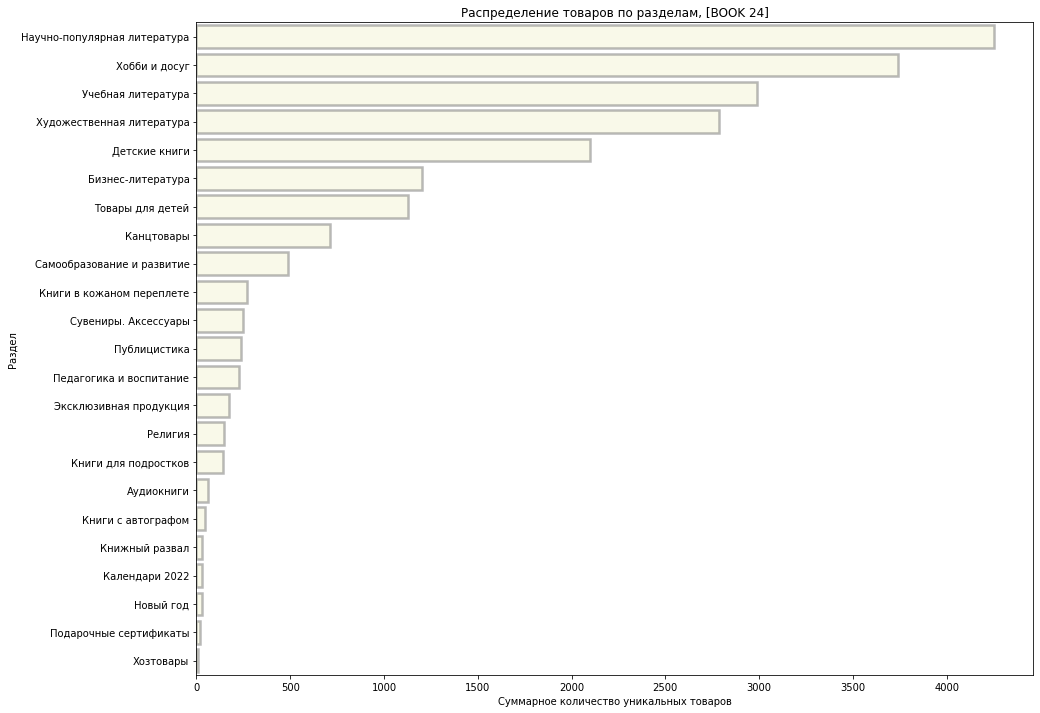

In [9]:
plt.figure(figsize=(15,12))
bc = sns.barplot(data=book24['type'].value_counts().to_frame().reset_index().rename({'type':'counts','index':'books'},axis=1),x='counts',y='books',linewidth=2.5,  edgecolor="0.5",color='lightgoldenrodyellow',alpha=0.55)
bc.set_xlabel("Суммарное количество уникальных товаров")
bc.set_ylabel("Раздел")
bc.set_title('Распределение товаров по разделам, [BOOK 24]');

### **2.1.3 Распределение потребительского спроса по разделам**

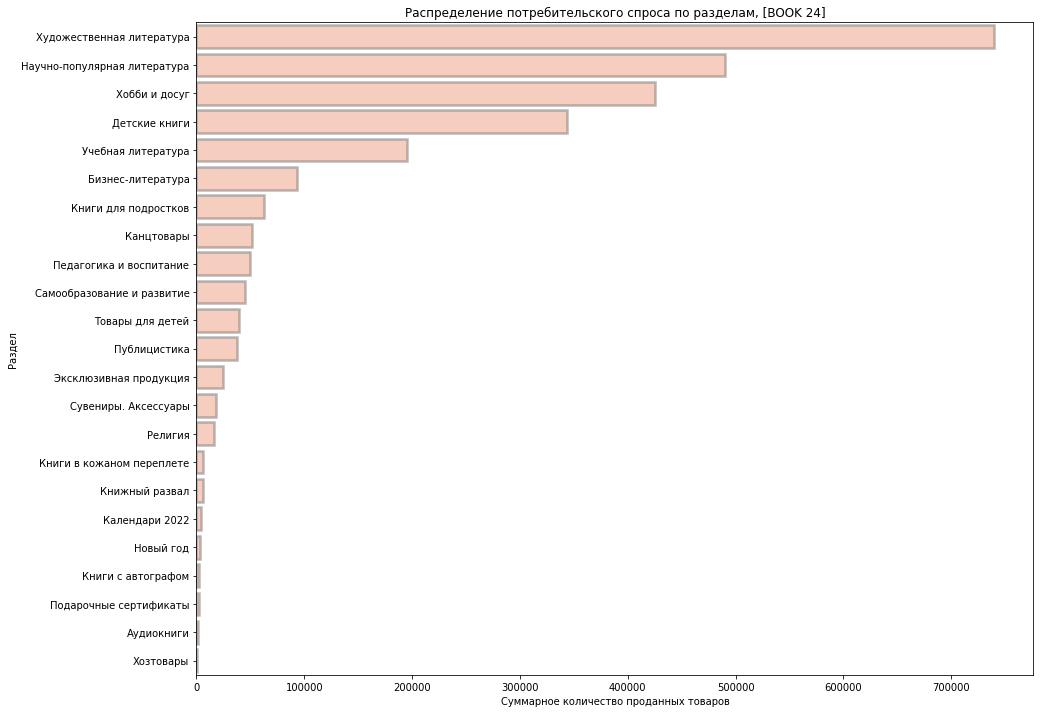

In [10]:
plt.figure(figsize=(15,12))
ax = sns.barplot(data=book24.groupby('type').sum().reset_index().sort_values(by='buy',ascending=False),x='buy',y='type',linewidth=2.5,  edgecolor="0.5", color='lightsalmon',alpha=0.55)
ax.set_xlabel("Суммарное количество проданных товаров")
ax.set_ylabel("Раздел");
ax.set_title('Распределение потребительского спроса по разделам, [BOOK 24]');
# ПОМЕНЯТЬ ОСЬ АБСЦИСС, ПОМЕНЯТЬ с 10000 на 10^4 К ПРИМЕРУ

### **2.1.4 График распределения среднего количества покупок товара по разделам**

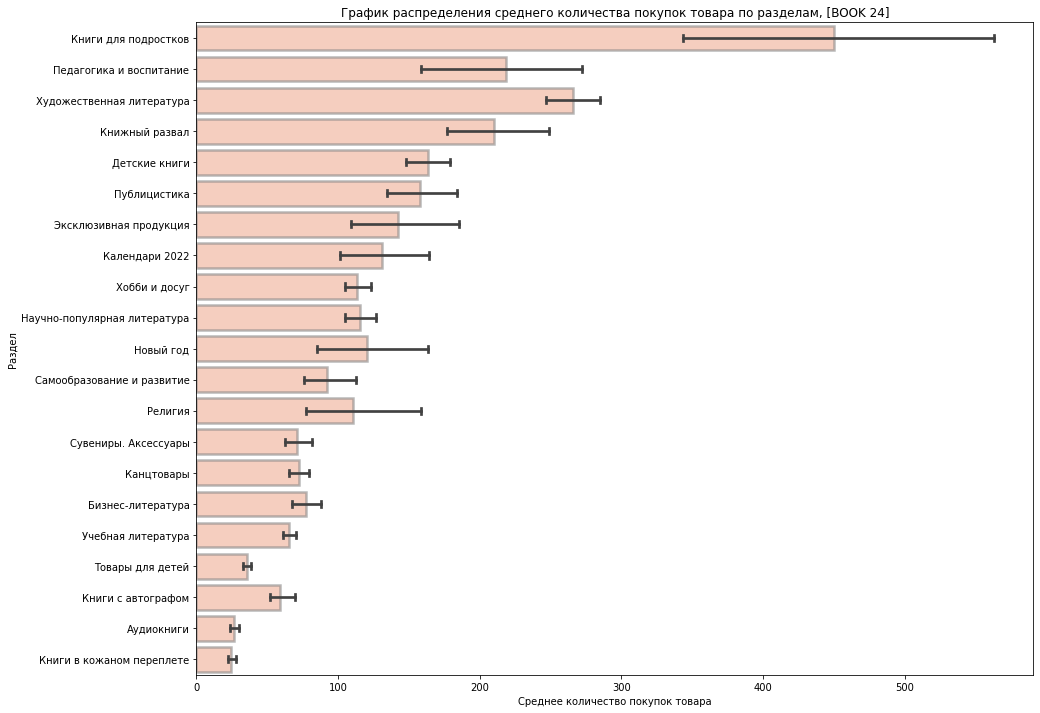

In [11]:
plt.figure(figsize=(15,12))
g = sns.barplot(data=book24,y='type',x='buy',capsize=.2,order=books.groupby('type').mean().sort_values(by='buy',ascending=False).reset_index()['type'],linewidth=2.5,  edgecolor="0.5",color='lightsalmon',alpha=0.55)
g.set_xlabel("Среднее количество покупок товара")
g.set_ylabel("Раздел");
g.set_title('График распределения среднего количества покупок товара по разделам, [BOOK 24]');

### **2.1.5 Список из 15 авторов с самым большим количеством работ за все время**

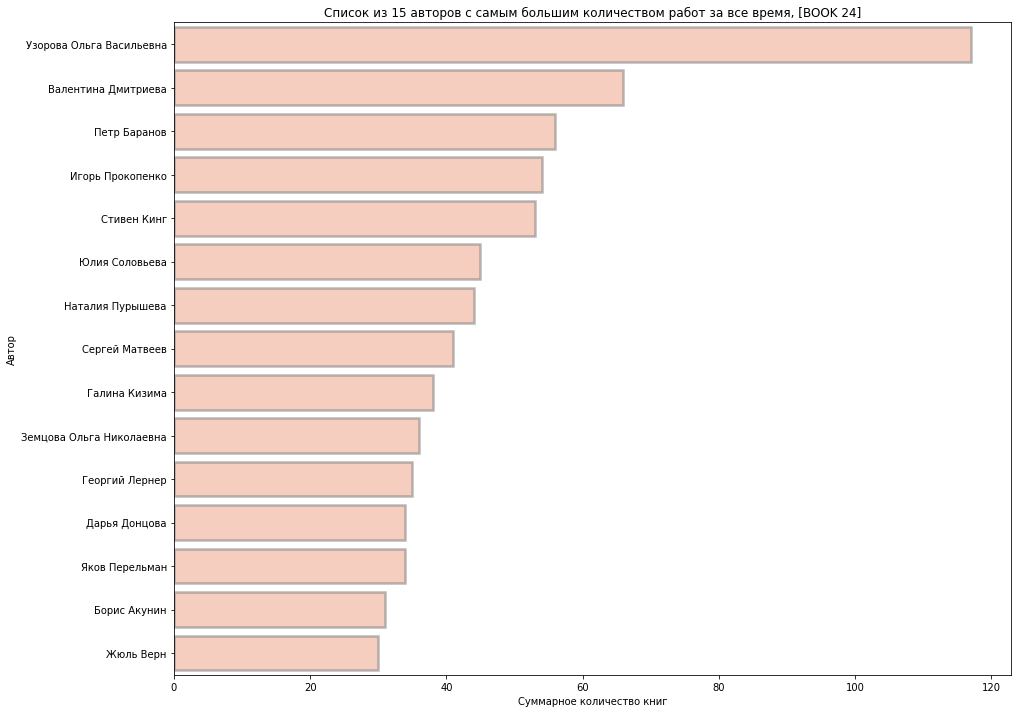

In [12]:
plt.figure(figsize=(15,12))
ac = sns.barplot(data=book24.author.value_counts().to_frame().reset_index().rename({'author':'counts','index':'author'},axis=1).iloc[0:15],x='counts',y='author',linewidth=2.5,  edgecolor="0.5",color='lightsalmon',alpha=0.55)
ac.set_xlabel("Суммарное количество книг")
ac.set_ylabel("Автор");
ac.set_title('Список из 15 авторов с самым большим количеством работ за все время, [BOOK 24]');

### **2.1.6 График распределения уникальных товаров на сайте по типу издательства**

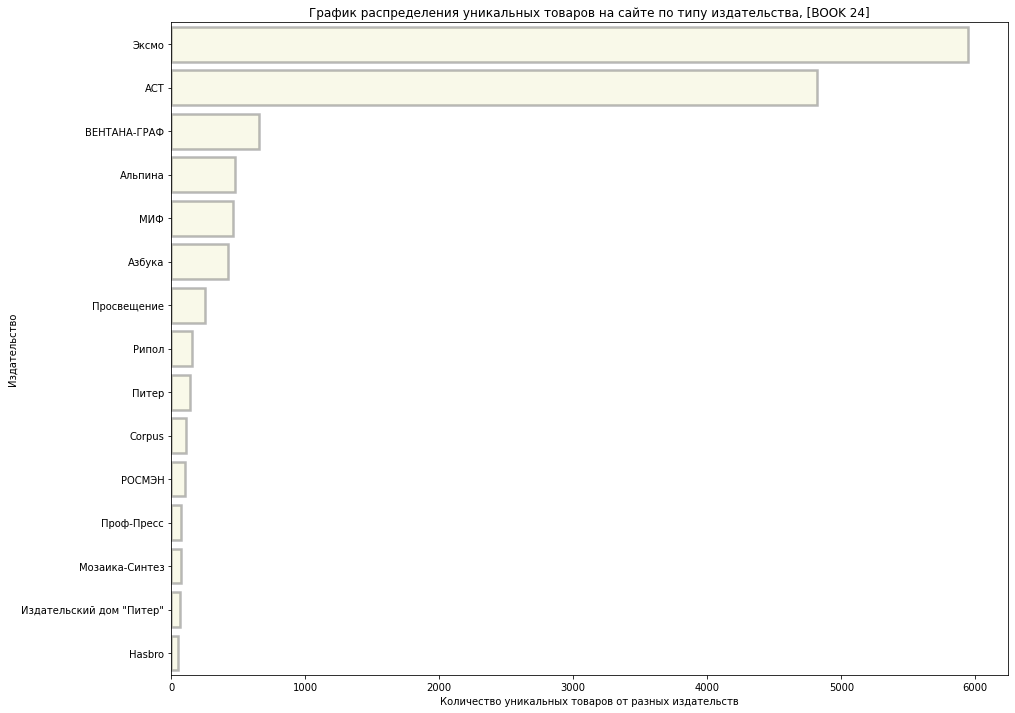

In [13]:
plt.figure(figsize=(15,12))
pc = sns.barplot(data=book24.publisher.value_counts().to_frame().reset_index().rename({'publisher':'counts','index':'publisher'},axis=1).iloc[0:15],x='counts',y='publisher',linewidth=2.5,  edgecolor="0.5",color='lightgoldenrodyellow',alpha=0.55)
pc.set_xlabel("Количество уникальных товаров от разных издательств")
pc.set_ylabel("Издательство");
pc.set_title('График распределения уникальных товаров на сайте по типу издательства, [BOOK 24]');

### **2.1.7 График распределения уникальных товаров на сайте по типу издательского бренда**

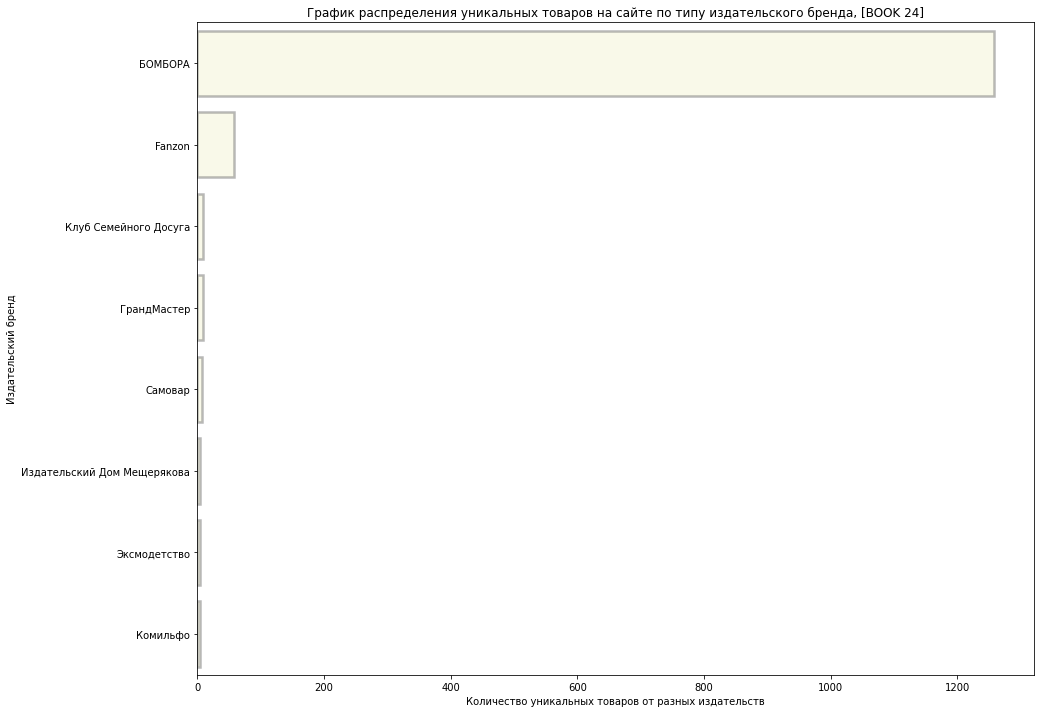

In [14]:
plt.figure(figsize=(15,12))
pc = sns.barplot(data=book24.publisher_brand.value_counts().to_frame().reset_index().rename({'publisher_brand':'counts','index':'publisher_brand'},axis=1).iloc[0:15],x='counts',y='publisher_brand',linewidth=2.5,  edgecolor="0.5",color='lightgoldenrodyellow',alpha=0.55)
pc.set_xlabel("Количество уникальных товаров от разных издательств")
pc.set_ylabel("Издательский бренд");
pc.set_title('График распределения уникальных товаров на сайте по типу издательского бренда, [BOOK 24]');

### **2.1.8 Самые продаваемые книги (ТОП 15)**

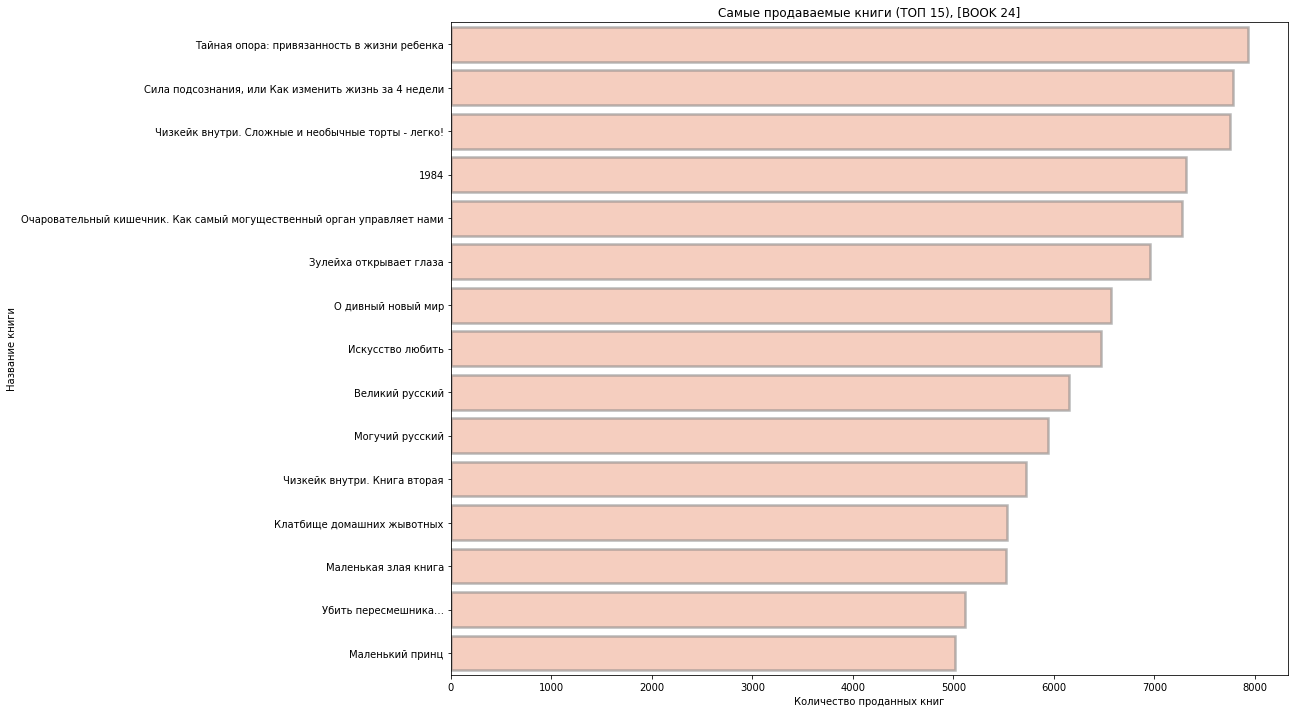

In [15]:
plt.figure(figsize=(15,12))
book_counts_in_period = book24.groupby('name').sum().reset_index().sort_values(by='buy', ascending=False)
book_counts = sns.barplot(data=book_counts_in_period.iloc[0:15,:],x='buy',y='name',linewidth=2.5,  edgecolor="0.5", color='lightsalmon',alpha=0.55)
book_counts.set_xlabel("Количество проданных книг")
book_counts.set_ylabel("Название книги");
book_counts.set_title('Самые продаваемые книги (ТОП 15), [BOOK 24]');

## **2.2 EDA [АСТ, BOOK24]**

### **2.2.1 График распределения спроса и предложения**

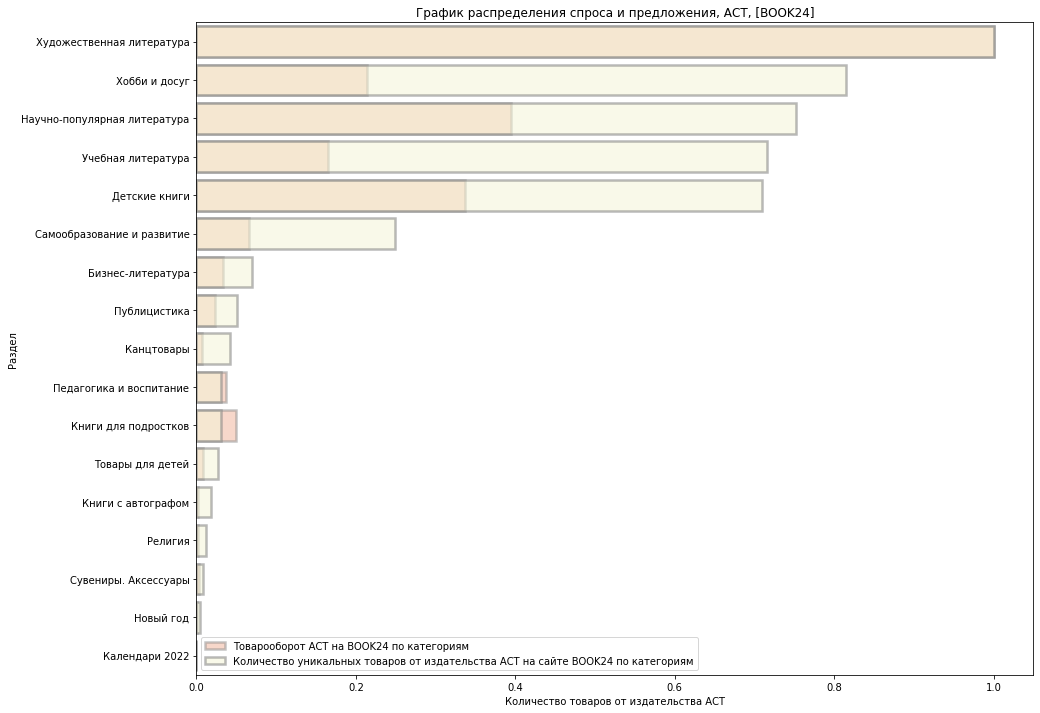

In [16]:
# В ячейке я чето намудрил с нормализацией и она вышла не совсем такой, какой я ее хотел видеть. Нужно будет переделать в интервал 0-1, т.е. чтобы сумма значений выходила в единицу.
### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###
# Сформируем датасет в котором будут нормализованные данные о суммарном количестве уникальных товаров АСТ на BOOK24 (если, например, большая часть товаров АСТ окажется в разделе "Художественная литература", то логично предположить, что данное издательство делает упор на подобном разделе. Данное наблюдение не говорит о продажах, об этом см. ниже. (дополнить) )
total_book24_ast = book24.loc[book24['publisher']=='АСТ']['type'].value_counts().to_frame().reset_index().rename({'index':'type','type':'count'},axis=1)
# Сформируем датасет в котором будут нормализованные данные о суммарных продажах АСТ на BOOK24
total_sellout_book24_ast = book24.loc[book24['publisher']=='АСТ'].groupby('type').sum().sort_values(by='buy',ascending=False).reset_index()
# Запишем значения в конечный датафрейм с информацией об АСТ по продажам и специализации направления 
total_ast = total_book24_ast.merge(total_sellout_book24_ast, on=["type"])
min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0,1))
result = min_max_scalar.fit_transform(total_ast.iloc[:,1:])
total_ast['count'] = result[:,0]
total_ast['buy'] = result[:,1]
total_ast
# Строим визуализацию спроса и предложения 
# Построим график товарооборота
plt.figure(figsize=(15,12))
trade_ast = sns.barplot(data=total_ast,x='buy',y='type',linewidth=2.5,  edgecolor="0.5",color='lightsalmon',alpha=0.45,label="Товарооборот АСТ на BOOK24 по категориям")
# Построим график, отображающий еще и количество уникальных товаров от АСТ в разных разделах
unique_ast = sns.barplot(data=total_ast,x='count',y='type',linewidth=2.5,  edgecolor="0.5",color='lightgoldenrodyellow',alpha=0.55,label="Количество уникальных товаров от издательства АСТ на сайте BOOK24 по категориям")
unique_ast.set_xlabel("Количество товаров от издательства АСТ")
unique_ast.set_ylabel("Раздел");
unique_ast.legend()
unique_ast.set_title('График распределения спроса и предложения, АСТ, [BOOK24]');

## **2.3 EDA [Эксмо, BOOK24]**

### **2.2.1 График распределения спроса и предложения**

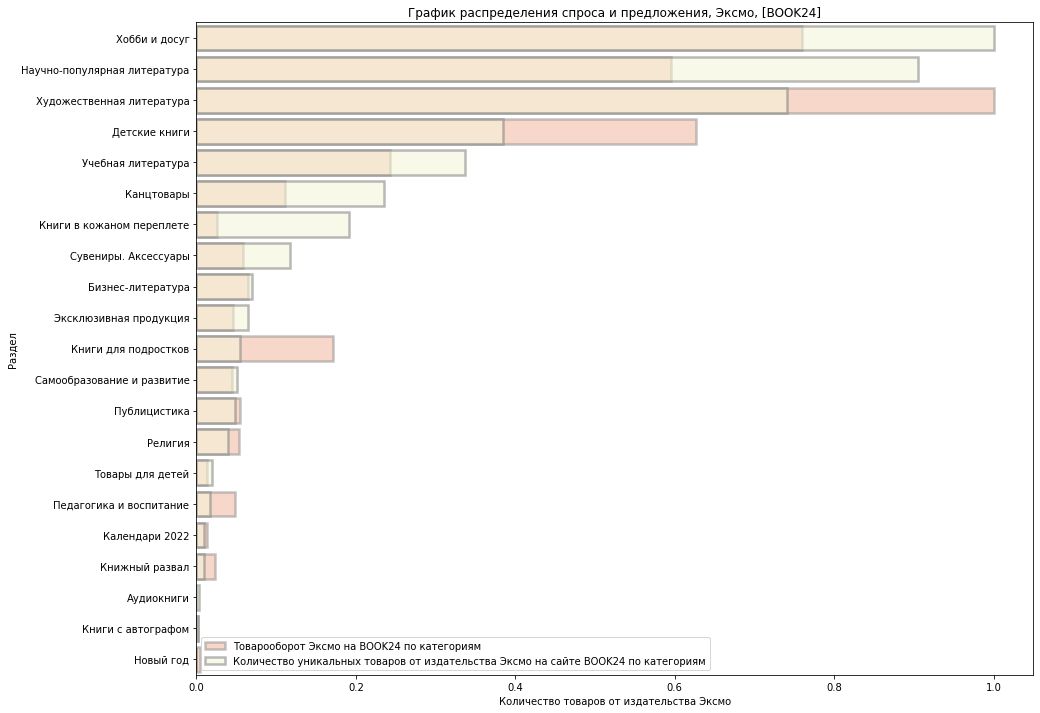

In [17]:
# В ячейке я чето намудрил с нормализацией и она вышла не совсем такой, какой я ее хотел видеть. Нужно будет переделать в интервал 0-1, т.е. чтобы сумма значений выходила в единицу.
### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###
# Сформируем датасет в котором будут нормализованные данные о суммарном количестве уникальных товаров Эксмо на BOOK24 (если, например, большая часть товаров Эксмо окажется в разделе "Художественная литература", то логично предположить, что данное издательство делает упор на подобном разделе. Данное наблюдение не говорит о продажах, об этом см. ниже. (дополнить) )
total_book24_eksmo = book24.loc[book24['publisher']=='Эксмо']['type'].value_counts().to_frame().reset_index().rename({'index':'type','type':'count'},axis=1)
# Сформируем датасет в котором будут нормализованные данные о суммарных продажах Эксмо на BOOK24
total_sellout_book24_eksmo = book24.loc[book24['publisher']=='Эксмо'].groupby('type').sum().sort_values(by='buy',ascending=False).reset_index()
# Запишем значения в конечный датафрейм с информацией об Эксмо по продажам и специализации направления 
total_eksmo = total_book24_eksmo.merge(total_sellout_book24_eksmo, on=["type"])
min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0,1))
result = min_max_scalar.fit_transform(total_eksmo.iloc[:,1:])
total_eksmo['count'] = result[:,0]
total_eksmo['buy'] = result[:,1]
total_eksmo
# Строим визуализацию спроса и предложения 
# Построим график товарооборота
plt.figure(figsize=(15,12))
trade_eksmo = sns.barplot(data=total_eksmo,x='buy',y='type',linewidth=2.5,  edgecolor="0.5",color='lightsalmon',alpha=0.45,label="Товарооборот Эксмо на BOOK24 по категориям")
# Построим график, отображающий еще и количество уникальных товаров от Эксмо в разных разделах
unique_eksmo = sns.barplot(data=total_eksmo,x='count',y='type',linewidth=2.5,  edgecolor="0.5",color='lightgoldenrodyellow',alpha=0.55,label="Количество уникальных товаров от издательства Эксмо на сайте BOOK24 по категориям")
unique_eksmo.set_xlabel("Количество товаров от издательства Эксмо")
unique_eksmo.set_ylabel("Раздел");
unique_eksmo.legend()
unique_eksmo.set_title('График распределения спроса и предложения, Эксмо, [BOOK24]');

## **2.4 Сравнение двух конкурирующих издательств [АСТ и Эксмо, BOOK24]**

In [18]:
unique_books_ast_eksmo = book24[book24['name'].duplicated(keep=False)].loc[(book24['publisher']=='АСТ') | (book24['publisher'] =='Эксмо')].groupby(['name','publisher']).last().sort_values(by='buy',ascending=False).reset_index()
dataframe_helper = unique_books_ast_eksmo[unique_books_ast_eksmo['name'].duplicated(keep=False)].groupby(['name','publisher']).last().reset_index()
dataframe_helper.dropna(subset=['author'],inplace=True) 
dataframe_helper['full_name'] = dataframe_helper['author']+[', ']+ dataframe_helper['name'] 
# dataframe_helper - почти чистый датафрейм, в котором содержится информация о схожих книгах двух издательств АСТ и Эксмо

In [28]:
unique_books_ast_eksmo_clear = dataframe_helper[dataframe_helper['full_name'].duplicated(keep=False)] # получим чистый датафрейм с 42 книгами
list_of_sum = unique_books_ast_eksmo_clear.groupby('name').sum().reset_index()
unique_books_ast_eksmo_sum = unique_books_ast_eksmo_clear.merge(list_of_sum, on=["name"])
unique_books_ast_eksmo_sum['percentage'] = unique_books_ast_eksmo_sum['buy_x']/unique_books_ast_eksmo_sum['buy_y'] # buy_y - количество книг, купленных у обоих издательств, т.е. 100 %

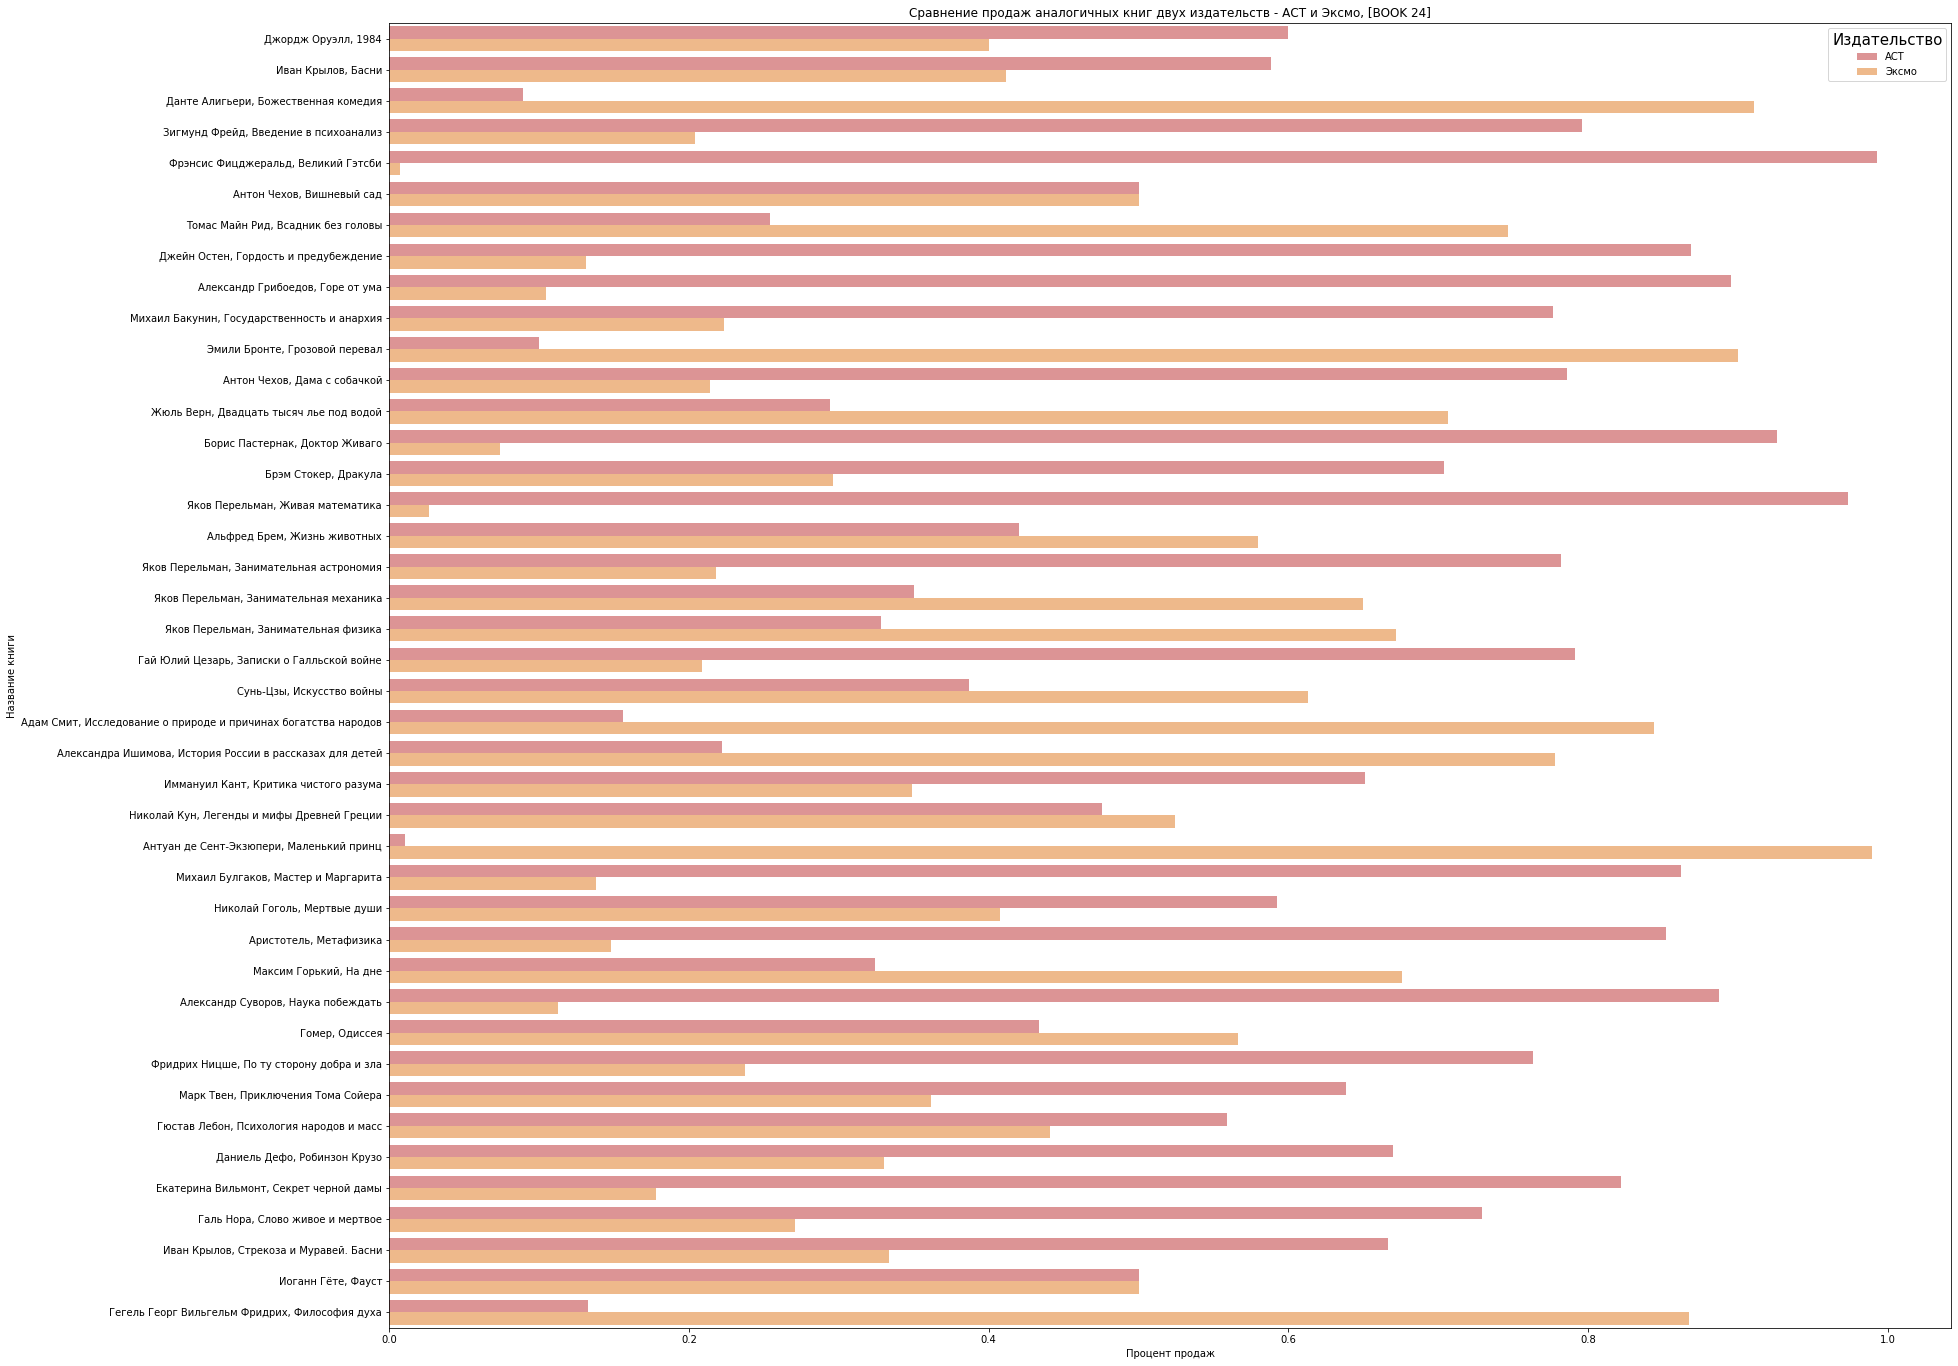

In [33]:
plt.figure(figsize=(28,24))   
book_battle = sns.barplot(data=unique_books_ast_eksmo_sum,x='percentage',y='full_name',hue='publisher',palette=palette,alpha=0.55)
book_battle.set_xlabel("Процент продаж")
book_battle.set_ylabel("Название книги");
book_battle.set_title('Сравнение продаж аналогичных книг двух издательств - АСТ и Эксмо, [BOOK 24]');
legend = book_battle.legend()
legend.set_title("Издательство", prop = {'size':15})

# **3. ML 🤖** 

# **4. Дальше будут тестовые ячейки, которые потом могут пригодиться на этапе тестирования. Пока не удалять**